In [1]:
from Model import LogisticReg
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
%load_ext autoreload
%autoreload 2

## I. Dataset

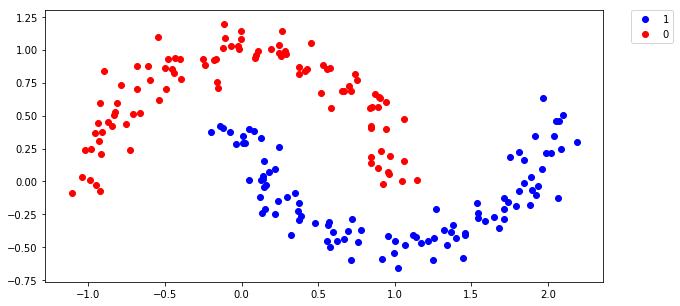

In [2]:
select='moon' # 'blob' or 'moon'
if select == 'moon':
    from sklearn.datasets import make_moons
    X_ori, y_ori = make_moons(n_samples=200, noise=0.1)
elif select == 'blob':
    from sklearn.datasets.samples_generator import make_blobs
    np.random.seed(1)
    X_ori, y_ori = make_blobs(n_samples=200, centers=2, n_features=2)

plt.figure(figsize=(10,5))
plt.scatter(*zip(*X_ori[y_ori==1]), c= 'b', label = '1')
plt.scatter(*zip(*X_ori[y_ori==0]), c= 'r', label = '0')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [3]:
X = X_ori.T
idx=np.random.permutation(X.shape[1])
y=y_ori.reshape(-1,1).T
X_train, X_test = X[:,idx[:int(X.shape[1]*0.8)]], X[:,idx[int(X.shape[1]*0.8):]]
y_train, y_test = y[:,idx[:int(X.shape[1]*0.8)]], y[:,idx[int(X.shape[1]*0.8):]]

## II. Logistic Regression 

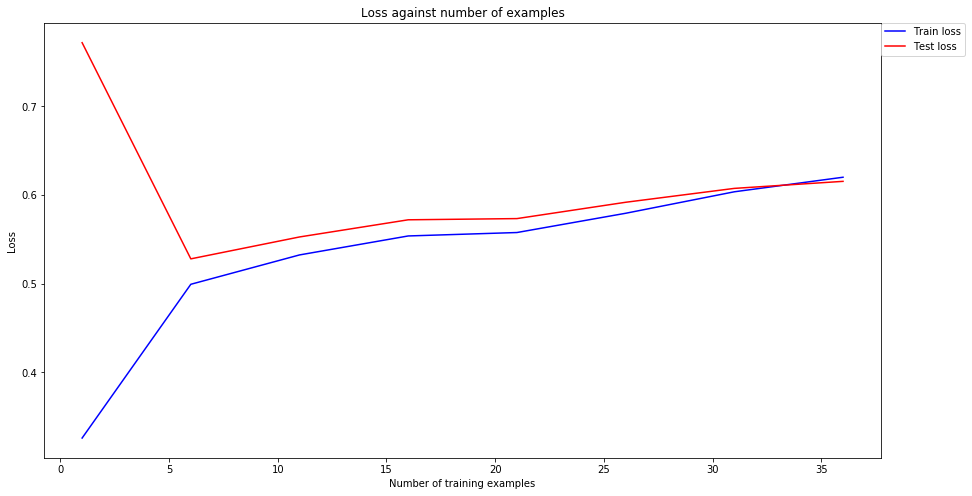

In [4]:
model=LogisticReg(X_train, y_train, X_test, y_test)
model.learning_curve_ex(iter = 1000, lr = 1, m_step = 5, max_ex = 40)

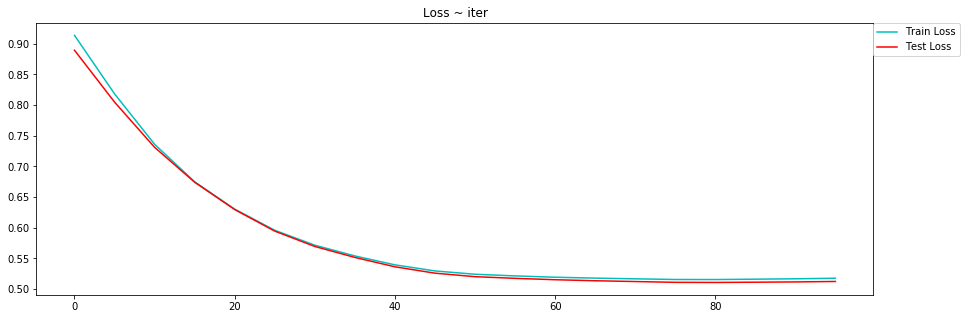

Train Error : 0.5185638917019701
Test Error : 0.5132000652269626
Accuracy Test : 0.85


In [5]:
np.random.seed(1)
model=LogisticReg(X_train, y_train, X_test, y_test)
model.train( iter = 100, lr=0.1, verbose=True)

**Training using annealing learning rate**

C:\Users\Eric\OneDrive - CentraleSupelec\git_repo\ML_from_scratch\Model.py:260: RuntimeWarning: divide by zero encountered in log
  cost = - Y * np.log(pred) - (1-Y) * np.log(1-pred)
C:\Users\Eric\OneDrive - CentraleSupelec\git_repo\ML_from_scratch\Model.py:260: RuntimeWarning: invalid value encountered in multiply
  cost = - Y * np.log(pred) - (1-Y) * np.log(1-pred)


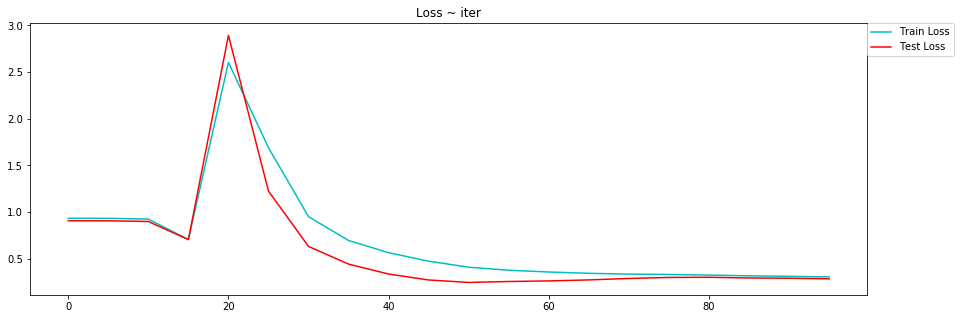

Train Error : 0.3032261786386323
Test Error : 0.28432003710187637
Accuracy Test : 0.85


In [6]:
np.random.seed(1)
model=LogisticReg(X_train, y_train, X_test, y_test)
model.train_ann_lr( iter = 100, verbose=True)

## III. Model Vizualisation

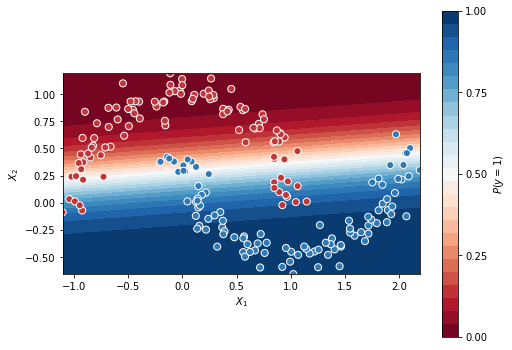

In [7]:
#grid
xx, yy = np.mgrid[np.min(X_ori[:,0]):np.max(X_ori[:,0]):.01, np.min(X_ori[:,1]):np.max(X_ori[:,1]):.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict_prob(grid.T).reshape(xx.shape)


f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs,25, cmap='RdBu',vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])
ax.scatter(*zip(*X_ori), c= y_ori, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)


ax.set(aspect="equal", xlim=(np.min(X_ori[:,0]),np.max(X_ori[:,0])), \
       ylim = (np.min(X_ori[:,1]),np.max(X_ori[:,1])) , xlabel="$X_1$", ylabel="$X_2$")
plt.show()

learning rate :  2e-06 - cost :  0.45293411926439725


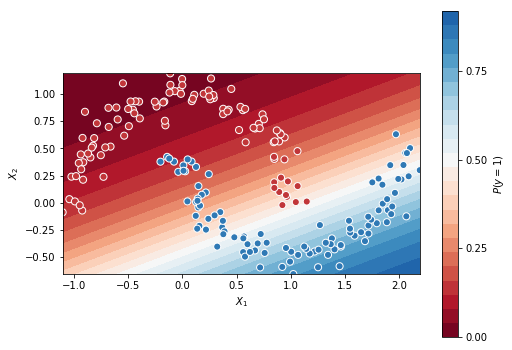

[[-0.2        -0.09552607 -0.02792205]]
learning rate :  4e-06 - cost :  0.4529340171776447


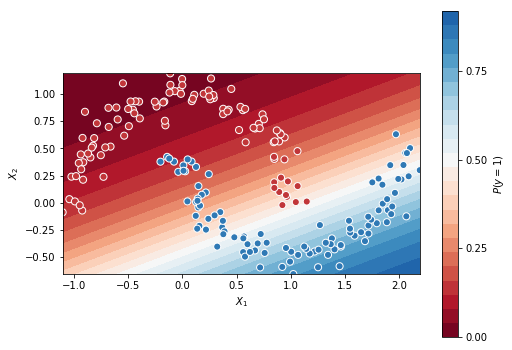

[[-0.2        -0.09552607 -0.02792205]]
learning rate :  8e-06 - cost :  0.4529338130042852


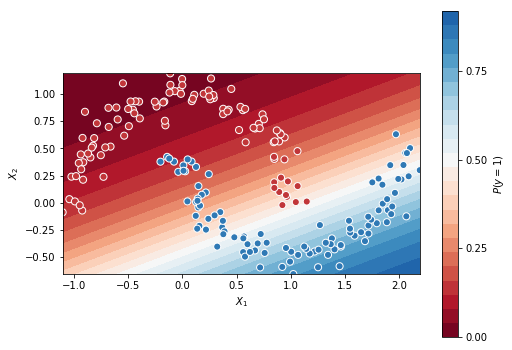

[[-0.2        -0.09552607 -0.02792205]]
learning rate :  1.6e-05 - cost :  0.4529334046581493


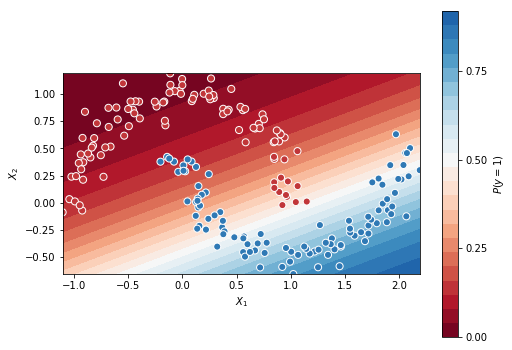

[[-0.2        -0.09552607 -0.02792205]]
learning rate :  3.2e-05 - cost :  0.45293258796821034


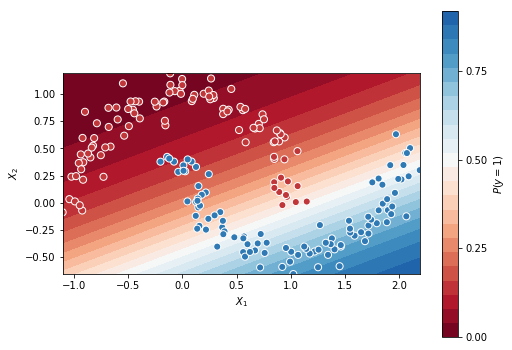

[[-0.2        -0.09552607 -0.02792205]]
learning rate :  6.4e-05 - cost :  0.4529309545976635


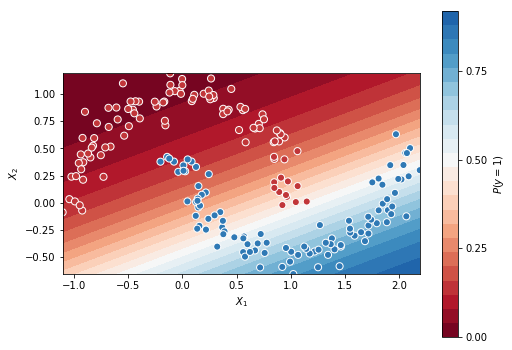

[[-0.2        -0.09552607 -0.02792205]]
learning rate :  0.000128 - cost :  0.45292768789389337


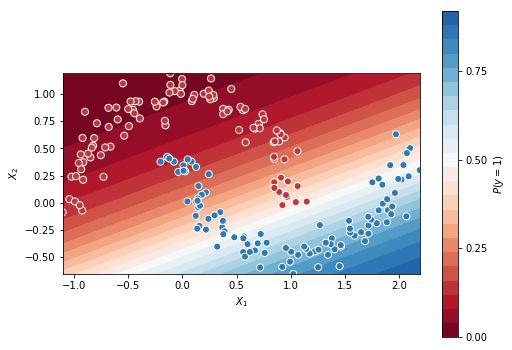

[[-0.2        -0.09552607 -0.02792205]]
learning rate :  0.000256 - cost :  0.45292115463564786


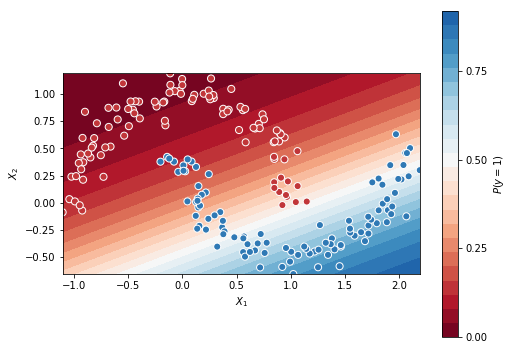

[[-0.2        -0.09552607 -0.02792205]]
learning rate :  0.000512 - cost :  0.4529080887163346


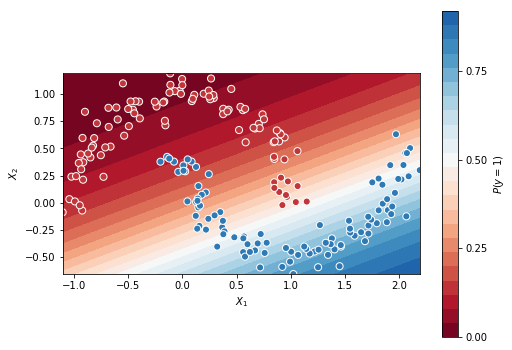

[[-0.2        -0.09552607 -0.02792205]]
learning rate :  0.001024 - cost :  0.45288195926641334


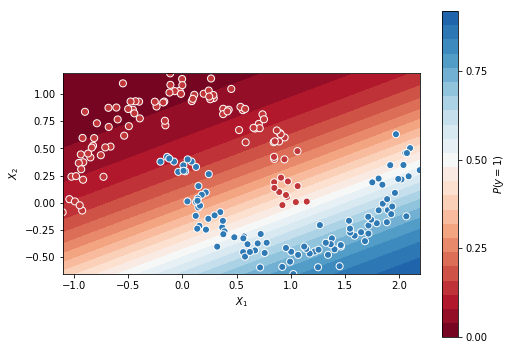

[[-0.2        -0.09552607 -0.02792205]]
learning rate :  0.002048 - cost :  0.4528297099213422


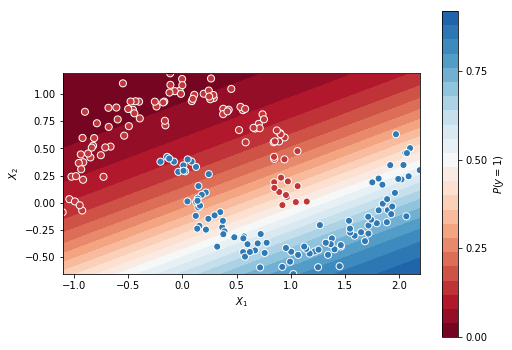

[[-0.2        -0.09552607 -0.02792205]]
learning rate :  0.004096 - cost :  0.4527252494498876


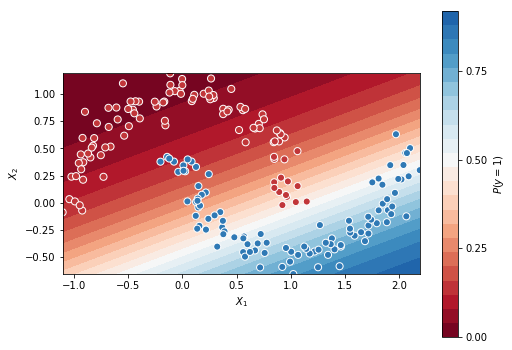

[[-0.2        -0.09552607 -0.02792205]]
learning rate :  0.008192 - cost :  0.4525164813785242


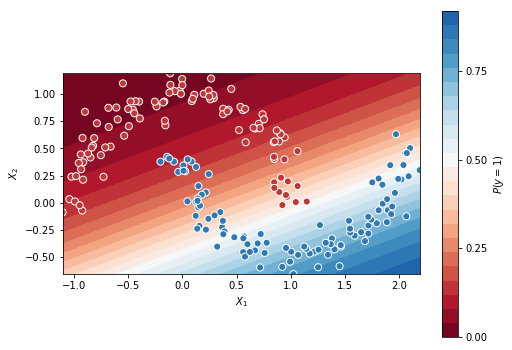

[[-0.2        -0.09552607 -0.02792205]]
learning rate :  0.016384 - cost :  0.45209955669601687


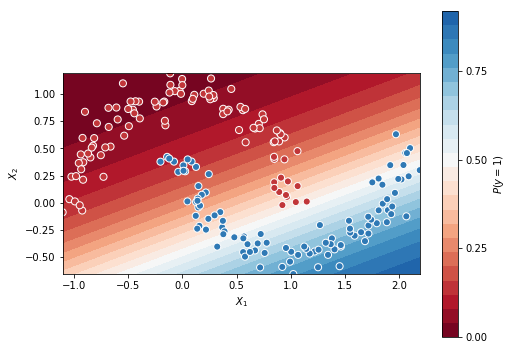

[[-0.2        -0.09552607 -0.02792205]]
learning rate :  0.032768 - cost :  0.45126815295891587


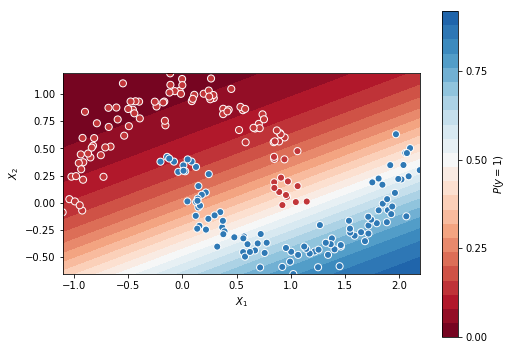

[[-0.19375    -0.08422674 -0.02652747]]
learning rate :  0.065536 - cost :  0.44961512620889466


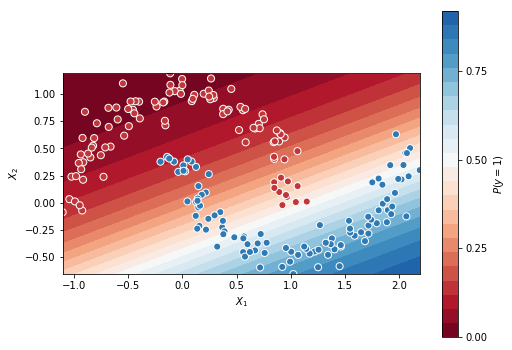

[[-0.19375    -0.08422674 -0.02652747]]
learning rate :  0.131072 - cost :  0.4465300608188182


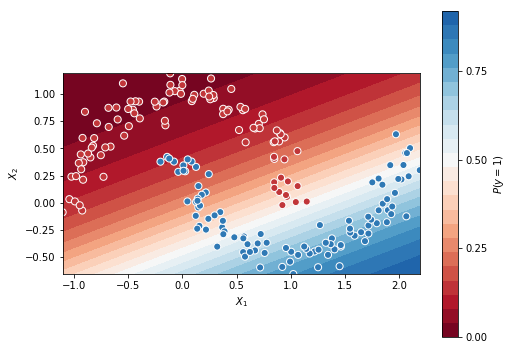

[[-0.19375    -0.08422674 -0.02652747]]
learning rate :  0.262144 - cost :  0.4404980476352634


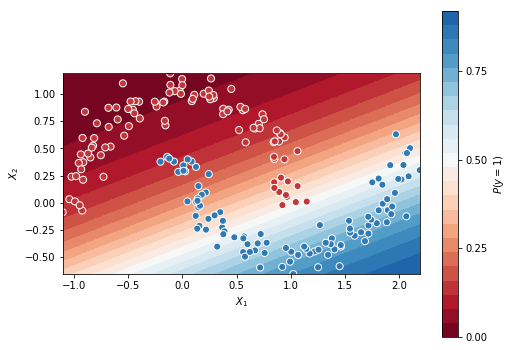

[[-0.175      -0.06197885 -0.02609432]]
learning rate :  0.524288 - cost :  0.4289855296399529


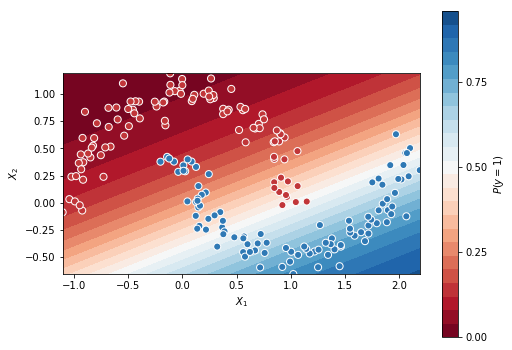

[[-0.1375     -0.00952445 -0.01994452]]
learning rate :  1.048576 - cost :  0.4109344008541983


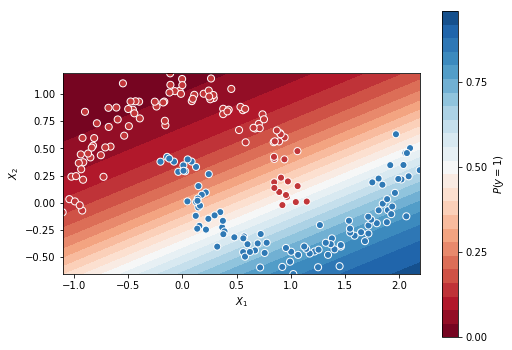

[[-0.11875     0.00015242 -0.02256237]]
learning rate :  2.097152 - cost :  0.39077736264502605


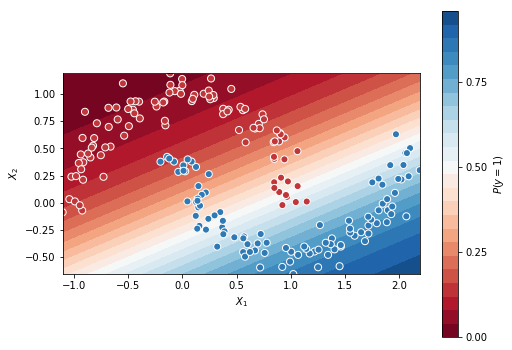

[[-0.0625      0.03124188 -0.02441357]]
learning rate :  4.194304 - cost :  0.36580918971767157


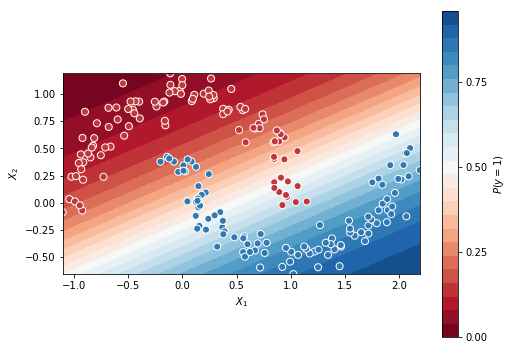

[[-0.04375     0.04998879 -0.01977671]]
learning rate :  8.388608 - cost :  0.3600613429970734


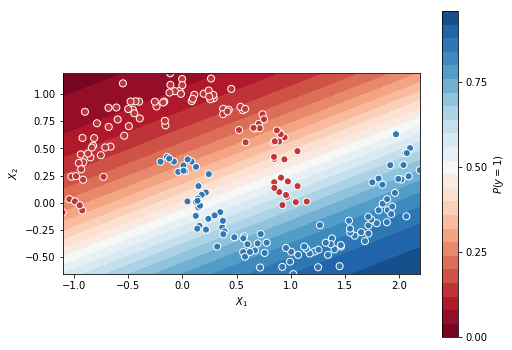

[[-0.01875     0.04272403 -0.02277582]]
learning rate :  4.194304 - cost :  0.39000767685524335


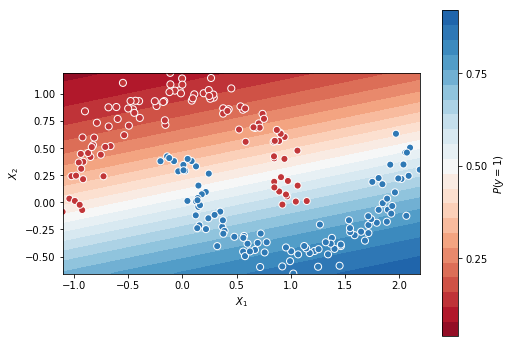

[[-0.025      -0.00041433 -0.03053927]]
learning rate :  2.097152 - cost :  0.416505678137901


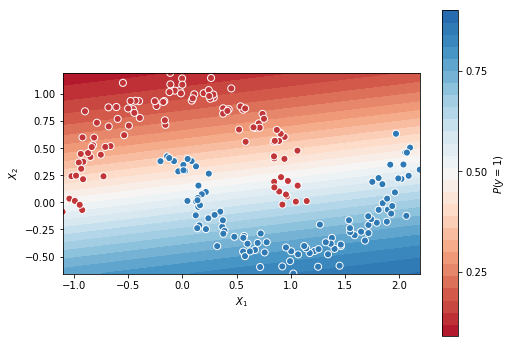

[[-0.0125     -0.00092969 -0.02901686]]
learning rate :  1.048576 - cost :  0.42022793995543284


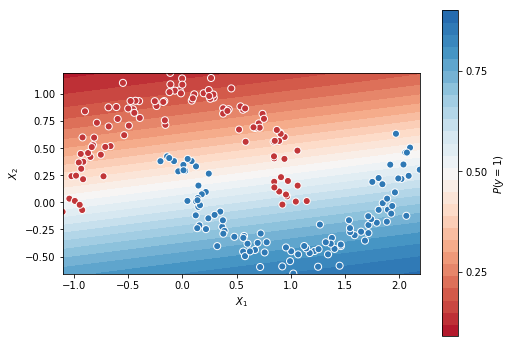

[[-0.0125     -0.00092969 -0.02901686]]
learning rate :  0.524288 - cost :  0.422391808104652


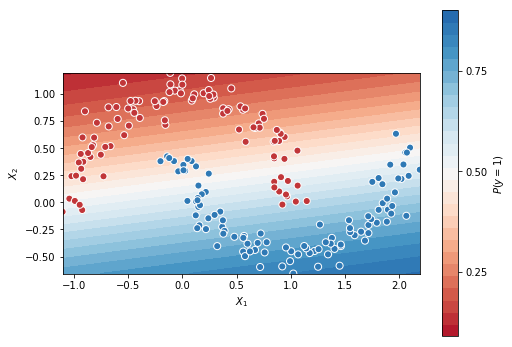

[[-0.0125     -0.00092969 -0.02901686]]
learning rate :  0.262144 - cost :  0.42352256233706626


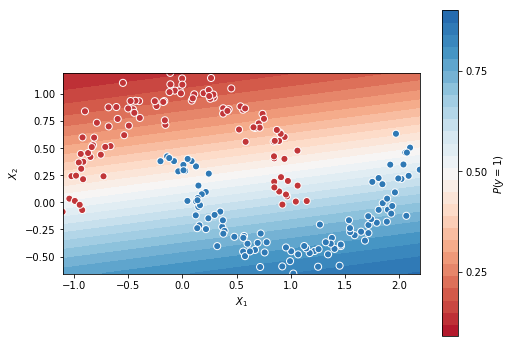

[[-0.0125     -0.00092969 -0.02901686]]
learning rate :  0.131072 - cost :  0.4241002504895925


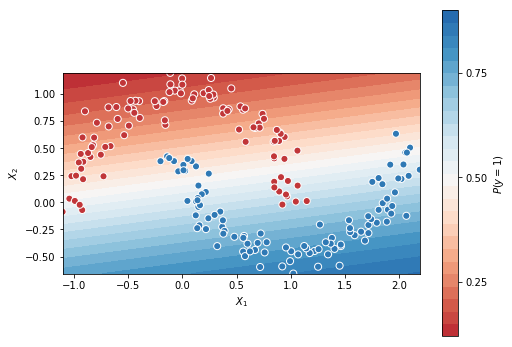

[[-0.0125     -0.00092969 -0.02901686]]
learning rate :  0.065536 - cost :  0.424392185526588


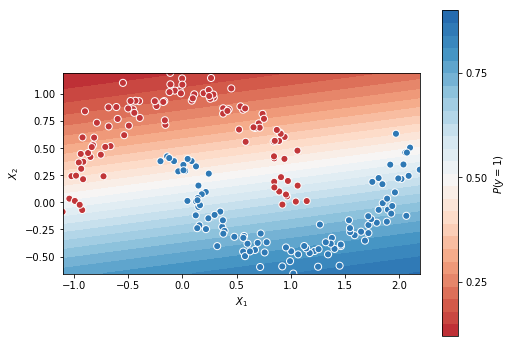

[[-0.0125     -0.00092969 -0.02901686]]
learning rate :  0.032768 - cost :  0.42453892743223315


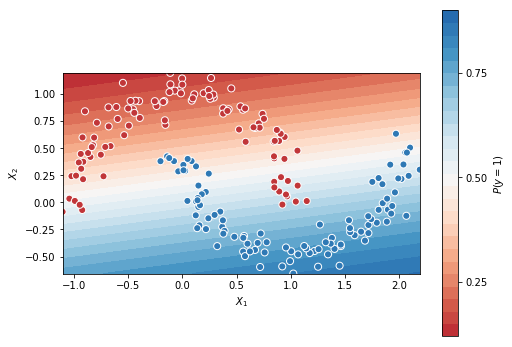

[[-0.0125     -0.00092969 -0.02901686]]
learning rate :  0.016384 - cost :  0.42461249218750263


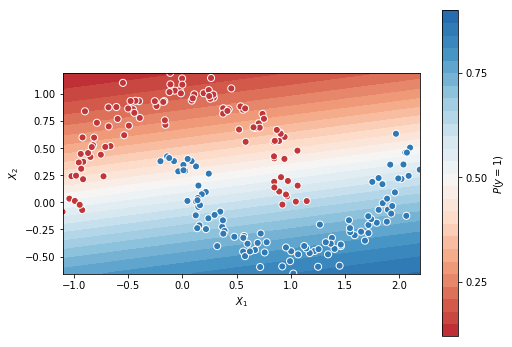

[[-0.0125     -0.00092969 -0.02901686]]
learning rate :  0.008192 - cost :  0.42464932304144326


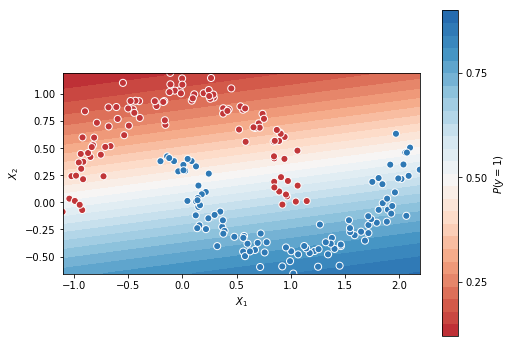

[[-0.0125     -0.00092969 -0.02901686]]
learning rate :  0.004096 - cost :  0.42466775059070094


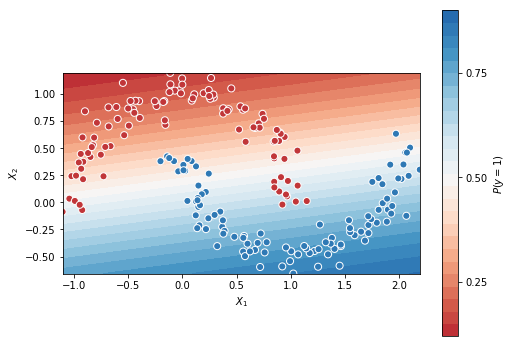

[[-0.0125     -0.00092969 -0.02901686]]
learning rate :  0.002048 - cost :  0.424676967396303


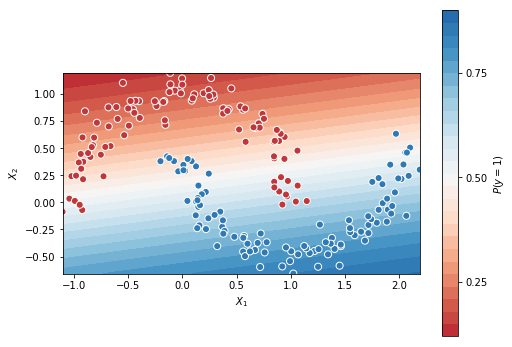

[[-0.0125     -0.00092969 -0.02901686]]
learning rate :  0.001024 - cost :  0.4246815765568973


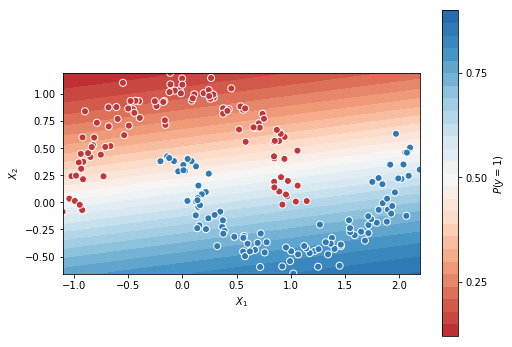

[[-0.0125     -0.00092969 -0.02901686]]
learning rate :  0.000512 - cost :  0.42468388132664925


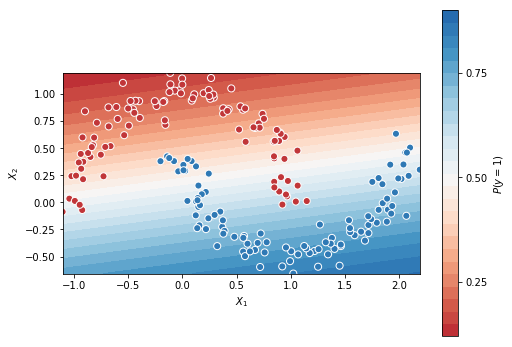

[[-0.0125     -0.00092969 -0.02901686]]
learning rate :  0.000256 - cost :  0.42468503375888966


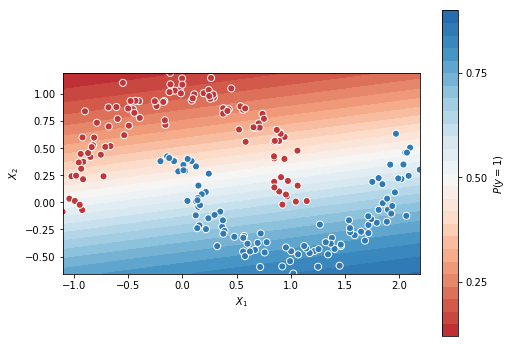

[[-0.0125     -0.00092969 -0.02901686]]
learning rate :  0.000128 - cost :  0.4246856099868511


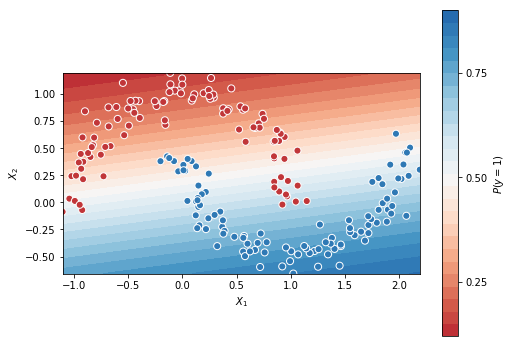

[[-0.0125     -0.00092969 -0.02901686]]
learning rate :  6.4e-05 - cost :  0.4246858981037921


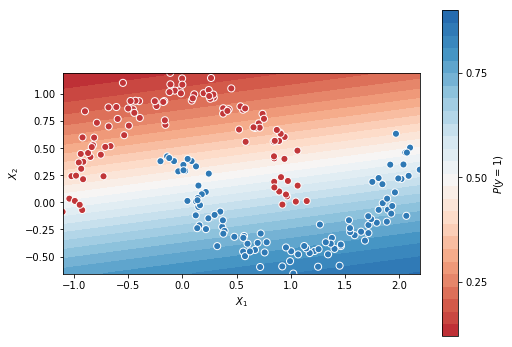

[[-0.0125     -0.00092969 -0.02901686]]


In [8]:
#Next : faire vidéo

# # np.random.seed(1)
# model=LogisticReg(X_train, y_train, X_test, y_test)
# lr=0.000001
# cost=100
# shrinked = False
# for i in range(40):
#     a = model.compute_cost(X_train, y_train)
#     if a< cost and shrinked == False:
#         lr *= 2
#     elif a > cost or np.isnan(a):
#         shrinked = True
#         lr/= 2
#     cost = a
#     print('learning rate : ', lr, '- cost : ', cost)
    
#     #grid
#     xx, yy = np.mgrid[np.min(X_ori[:,0]):np.max(X_ori[:,0]):.01, np.min(X_ori[:,1]):np.max(X_ori[:,1]):.01]
#     grid = np.c_[xx.ravel(), yy.ravel()]
#     probs = model.predict_prob(grid.T).reshape(xx.shape)


#     f, ax = plt.subplots(figsize=(8, 6))
#     contour = ax.contourf(xx, yy, probs,25, cmap='RdBu',vmin=0, vmax=1)
#     ax_c = f.colorbar(contour)
#     ax_c.set_label("$P(y = 1)$")
#     ax_c.set_ticks([0, .25, .5, .75, 1])
#     ax.scatter(*zip(*X_ori), c= y_ori, s=50,
#                cmap="RdBu", vmin=-.2, vmax=1.2,
#                edgecolor="white", linewidth=1)


#     ax.set(aspect="equal", xlim=(np.min(X_ori[:,0]),np.max(X_ori[:,0])), \
#            ylim = (np.min(X_ori[:,1]),np.max(X_ori[:,1])) , xlabel="$X_1$", ylabel="$X_2$")
#     plt.show()
#     model.train(1, lr, verbose=False)
#     print(model.compute_grad(X_train, y_train))

